In [133]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt

In [134]:
# Keep the outliers
def keepOnlyOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    #print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #print(f"lower_range: {lower_range}")
    #print(f"upper_range: {upper_range}")
    outlier_list = [x for x in data[col] if (
        (x < lower_range) | (x > upper_range))]
    return data.loc[data[col].isin(outlier_list)] 

## IDX options

In [135]:
dir_path = 'results_train_14w'

In [136]:
with open(f'{dir_path}/n_beats_interval_14w_IDX_2007-2009.pkl', 'rb') as f:
    idx_nbeats_mapes = pickle.load(f)

In [137]:
with open(f'{dir_path}/ETS_interval_14w_IDX_2007-2009.pkl', 'rb') as f:
    idx_ETS_mapes = pickle.load(f)

In [138]:
with open(f'{dir_path}/prophet_interval_14w_IDX_2007-2009.pkl', 'rb') as f:
    idx_prophet_mapes = pickle.load(f)

In [139]:
with open(f'{dir_path}/arima_interval_14w_IDX_2007-2009.pkl', 'rb') as f:
    idx_arima_mapes = pickle.load(f)

In [140]:
def createDataFrame(list_of_tuples, column_name):
    "create dataframes from list of mapes, dates tuples, pick end date"
    df = pd.DataFrame(list(map(lambda x: (x[0], x[1][1]), list_of_tuples)),\
                      columns=[column_name, 'Date'])
    df.set_index('Date', inplace=True)
    return df 

In [141]:
idx_arima_df = createDataFrame(idx_arima_mapes, 'arima_mape')
idx_ETS_df = createDataFrame(idx_ETS_mapes, 'ETS_mape')
idx_prophet_df = createDataFrame(idx_prophet_mapes, 'prophet_mape')
idx_nbeats_df = createDataFrame(idx_nbeats_mapes, 'nbeats_mape').multiply(100) 

In [142]:
idx_arima_df.head(3)

arima_mape
Date                  
2007-02-26   53.988119
2007-03-05   53.117366
2007-03-12   30.025574

In [143]:
idx_ETS_df.head(3)

ETS_mape
Date                 
2007-02-26  22.144439
2007-03-05  44.151266
2007-03-12  19.412649

In [146]:
df = pd.concat([idx_arima_df, idx_ETS_df, idx_prophet_df, idx_nbeats_df],\
               axis=1)
df['wmape'] = (df['arima_mape'] + df['ETS_mape'] + df['prophet_mape'] + df['nbeats_mape'])/4
df.head(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2007-02-26   53.988119  22.144439     30.473928    28.854972  33.865365
2007-03-05   53.117366  44.151266     50.361485   128.811064  69.110295
2007-03-12   30.025574  19.412649     35.142070    22.489349  26.767410

In [144]:
idx_prophet_df.head(3)

prophet_mape
Date                    
2007-02-26     30.473928
2007-03-05     50.361485
2007-03-12     35.142070

In [145]:
idx_nbeats_df.head(3)

nbeats_mape
Date                   
2007-02-26    28.854972
2007-03-05   128.811064
2007-03-12    22.489349

We are taking 12 weeks moving windows for finding if last week is outlier. 

In [147]:
upper_limit = df.shape[0] - 12 
arima_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'arima_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        arima_anomaly.append(anomaly)
        print(anomaly)


2007-07-02 00:00:00
2007-09-03 00:00:00
2007-12-31 00:00:00
2008-08-25 00:00:00
2008-10-20 00:00:00
2008-12-01 00:00:00
2009-05-25 00:00:00
2009-06-29 00:00:00
2009-10-26 00:00:00
2009-11-23 00:00:00
2009-12-28 00:00:00


In [148]:
upper_limit = df.shape[0] - 12 
ETS_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'ETS_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        ETS_anomaly.append(anomaly)
        print(anomaly)


2007-08-27 00:00:00
2007-11-26 00:00:00
2007-12-31 00:00:00
2008-07-28 00:00:00
2008-08-25 00:00:00
2008-10-20 00:00:00
2008-12-29 00:00:00
2009-04-27 00:00:00
2009-05-25 00:00:00
2009-06-29 00:00:00
2009-08-31 00:00:00
2009-11-23 00:00:00
2009-11-30 00:00:00
2009-12-28 00:00:00


In [149]:
upper_limit = df.shape[0] - 12 
prophet_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'prophet_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        prophet_anomaly.append(anomaly)
        print(anomaly)

2007-07-02 00:00:00
2007-07-09 00:00:00
2007-12-31 00:00:00
2008-08-25 00:00:00
2008-09-01 00:00:00
2008-12-01 00:00:00
2008-12-29 00:00:00
2009-04-27 00:00:00
2009-05-25 00:00:00
2009-11-23 00:00:00
2009-11-30 00:00:00
2009-12-28 00:00:00


In [150]:
upper_limit = df.shape[0] - 12 
nbeats_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_anomaly.append(anomaly)
        print(anomaly)

2007-07-30 00:00:00
2008-01-21 00:00:00
2008-06-23 00:00:00
2008-09-22 00:00:00
2008-10-06 00:00:00
2009-02-23 00:00:00
2009-04-06 00:00:00


In [151]:
upper_limit = df.shape[0] - 12 
wmape_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'wmape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        wmape_anomaly.append(anomaly)
        print(anomaly)

2007-11-26 00:00:00
2007-12-31 00:00:00
2008-08-25 00:00:00
2008-10-20 00:00:00
2008-12-01 00:00:00
2008-12-29 00:00:00
2009-05-25 00:00:00
2009-06-29 00:00:00
2009-11-30 00:00:00
2009-12-28 00:00:00


In [152]:
df.tail(3)

arima_mape   ETS_mape  prophet_mape  nbeats_mape      wmape
Date                                                                   
2010-02-01   55.414637  38.890966     48.848861    30.062386  43.304212
2010-02-08   97.583411  40.692122     27.194478    23.440417  47.227607
2010-02-15   27.929075  23.627864     44.687276    23.096367  29.835146

In [153]:
with open('IDX_options.pkl', 'rb') as f:
    idx_opt = pickle.load(f)

<AxesSubplot:xlabel='Date'>

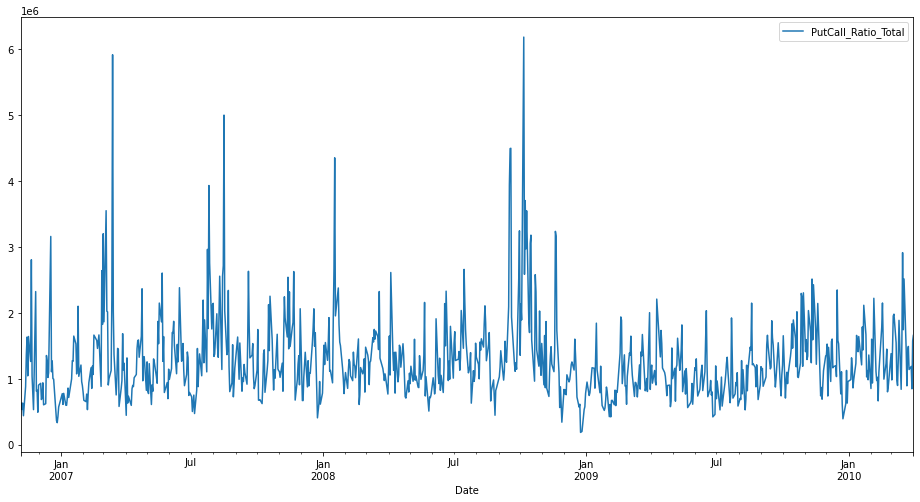

In [154]:
idx_opt[:'2010-04-01'].plot(figsize=(16,8))

In [155]:
idx_opt1 = idx_opt[:'2010-04-01']

In [156]:
def outlier_detection(option_df, anomalies):
    """
    Add column 'anomaly' to dataframe to mark outliers as True, non-outliers as False. 
    """
    # identify outliers
    option_df = option_df.assign(anomaly = False)
    for idx in anomalies:
        option_df.loc[idx, 'anomaly'] = True
    
    return option_df

In [174]:
arima_detection = outlier_detection(idx_opt1, arima_anomaly)
ETS_detection = outlier_detection(idx_opt1, ETS_anomaly)
prophet_detection = outlier_detection(idx_opt1, prophet_anomaly)
nbeats_detection = outlier_detection(idx_opt1, nbeats_anomaly)
average_detection = outlier_detection(idx_opt1, wmape_anomaly)

In [169]:
def visualize_outliers(anomaly_detection, model_name):
    anomaly_detection.reset_index(inplace=True)
    # visualization of outliers detected
    fig, ax = plt.subplots(figsize=(15,5))
    a = anomaly_detection[anomaly_detection['anomaly'] == True]  # anomaly
    ax.plot(anomaly_detection.Date, anomaly_detection['PutCall_Ratio_Total'], color='black', label = 'Normal')
    ax.scatter(a.Date, a['PutCall_Ratio_Total'], color='red', label = 'Anomaly')
    plt.title(f'Structural Break Detection with {model_name}')
    plt.legend()
    plt.show()


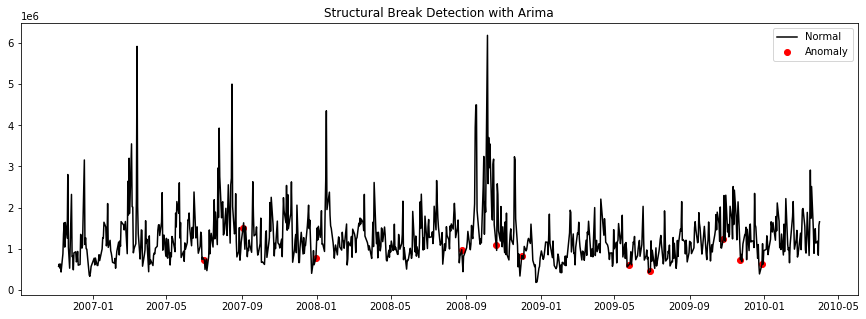

In [170]:
visualize_outliers(arima_detection, 'Arima') 

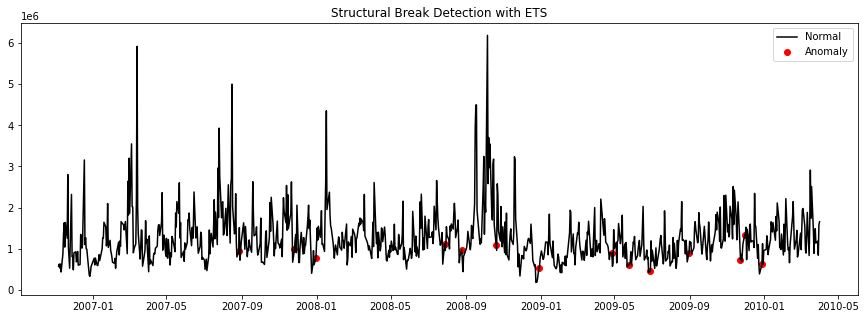

In [171]:
visualize_outliers(ETS_detection, 'ETS') 

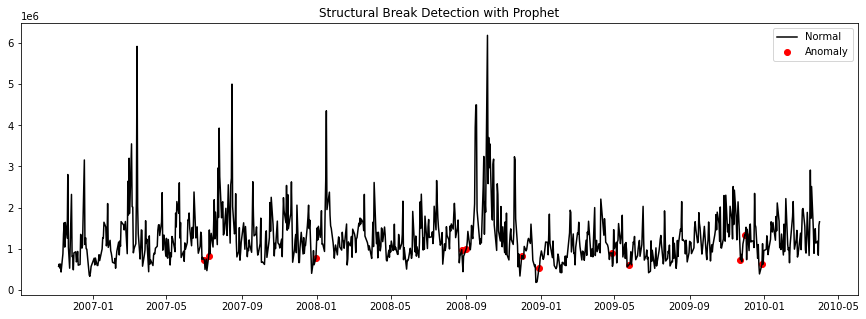

In [172]:
visualize_outliers(prophet_detection, 'Prophet') 

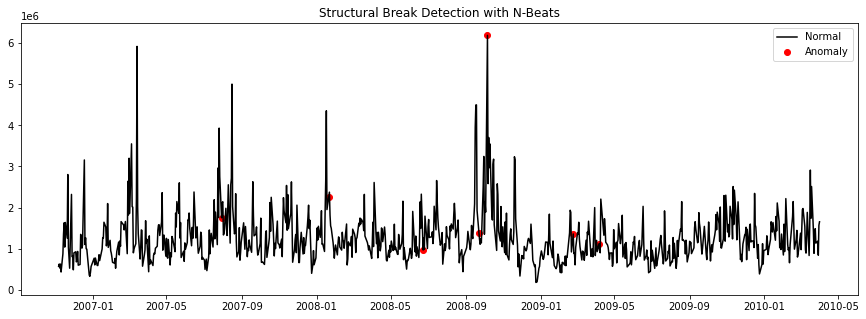

In [173]:
visualize_outliers(nbeats_detection, 'N-Beats') 

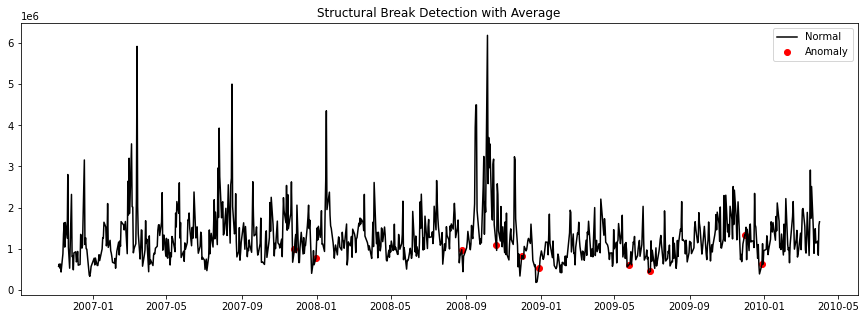

In [175]:
visualize_outliers(average_detection, 'Average') 